In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mplt
from matplotlib import rcParams
from matplotlib import rc
import matplotlib.dates as mdates
rc('mathtext', default='regular') 
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'serif'
rcParams['font.size'] = 17

In [2]:
bonne = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/smoke/BonneZip/bigPurpleAirZip_os.csv")
bonne['Date'] = pd.to_datetime(bonne['Date'])
kate = pd.read_csv("C:/Users/olivia.sablan/OneDrive - State of New Mexico/Documents/Data/smoke/KateZip/AllZipSmoke_Total_os.csv")
kate['Date'] = pd.to_datetime(kate['Date'])
kamalavg = pd.read_csv('../Data/smoke/KamalZip/Kamal_average_reformat_all_OS.csv')
kamalmax = pd.read_csv('../Data/smoke/KamalZip/Kamal_max_reformat_all_OS.csv')
kamalavg['Date'] = pd.to_datetime(kamalavg['Date'])
kamalmax['Date'] = pd.to_datetime(kamalmax['Date'])

In [3]:
dailybonne = bonne.groupby('Date').mean().reset_index()
dailybonne = dailybonne[(dailybonne['Date'].dt.strftime('%Y-%m-%d') >= '2022-04-01') & (dailybonne['Date'].dt.strftime('%Y-%m-%d') < '2022-10-01')]
dailykate = kate.groupby('Date').mean().reset_index()
dailykate = dailykate[(dailykate['Date'].dt.strftime('%Y-%m-%d') >= '2022-04-01') & (dailykate['Date'].dt.strftime('%Y-%m-%d') < '2022-10-01')]
dailykamalavg = kamalavg.groupby('Date').mean().reset_index()
dailykamalmax = kamalmax.groupby('Date').mean().reset_index()


Text(0.5, 1.0, 'State Average Population-Weighted ZIP Code Smoke PM$_{2.5}$')

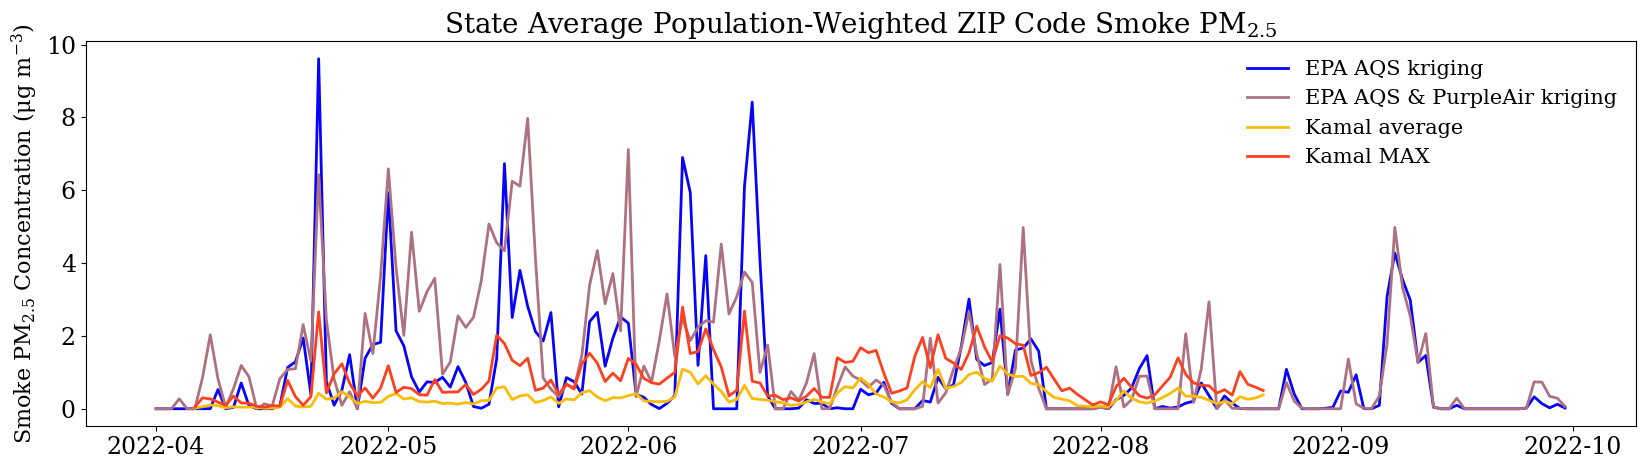

In [4]:
fig, ax = plt.subplots(figsize = (20,5))
ax.plot(dailykate['Date'], dailykate['smokepm25'], color = 'xkcd:primary blue', lw = 2, label = 'EPA AQS kriging')
ax.plot(dailybonne['Date'], dailybonne['smokepm25'], color = 'xkcd:mauve', lw = 2, label = 'EPA AQS & PurpleAir kriging')
ax.plot(dailykamalavg['Date'], dailykamalavg['smokepm25'], color = 'xkcd:golden rod', lw = 2, label = 'Kamal average')
ax.plot(dailykamalmax['Date'], dailykamalmax['smokepm25'], color = 'xkcd:orange red',  lw = 2, label = 'Kamal MAX')


#ax.fill_between(calfcanyon['Date'], 0, 12)
ax.legend(frameon =False, fontsize = 15)
ax.set_ylabel('Smoke PM$_{2.5}$ Concentration ($\mu $g $ m^{-3}$)', fontsize = 16)
ax.set_title('State Average Population-Weighted ZIP Code Smoke PM$_{2.5}$', fontsize = 20)

In [5]:
ED = pd.read_csv('../Data/health/ED/ED_data.csv')
ED['Date'] = pd.to_datetime(ED['Date'])
ED = ED[['Date', "age", "allresp1", "asthma1","COPD1","pneumonia1","bronchitis1", "allcardio1", "cardiacarrest1","arrythmia1","heartfail1","ischemic1","MI1","cerebrovascular1"]]
weeklyED = ED.groupby(pd.Grouper(key = 'Date', freq = '1W')).sum().reset_index()
ESSENCE = pd.read_csv('../Data/health/ESSENCE/ALLCLEANED_ESSENCE.csv')
ESSENCE['Date'] = pd.to_datetime(ESSENCE['Date'])
ESSENCE = ESSENCE[['Date', 'BroadResp', 'Asthma', 'Cardio', 'AQResp']]
weeklyESSENCE = ESSENCE.groupby(pd.Grouper(key = 'Date', freq = '1W')).sum().reset_index()

C:\Users\olivia.sablan\AppData\Local\Temp\ipykernel_14700\1760677372.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ED = pd.read_csv('../Data/health/ED/ED_data.csv')


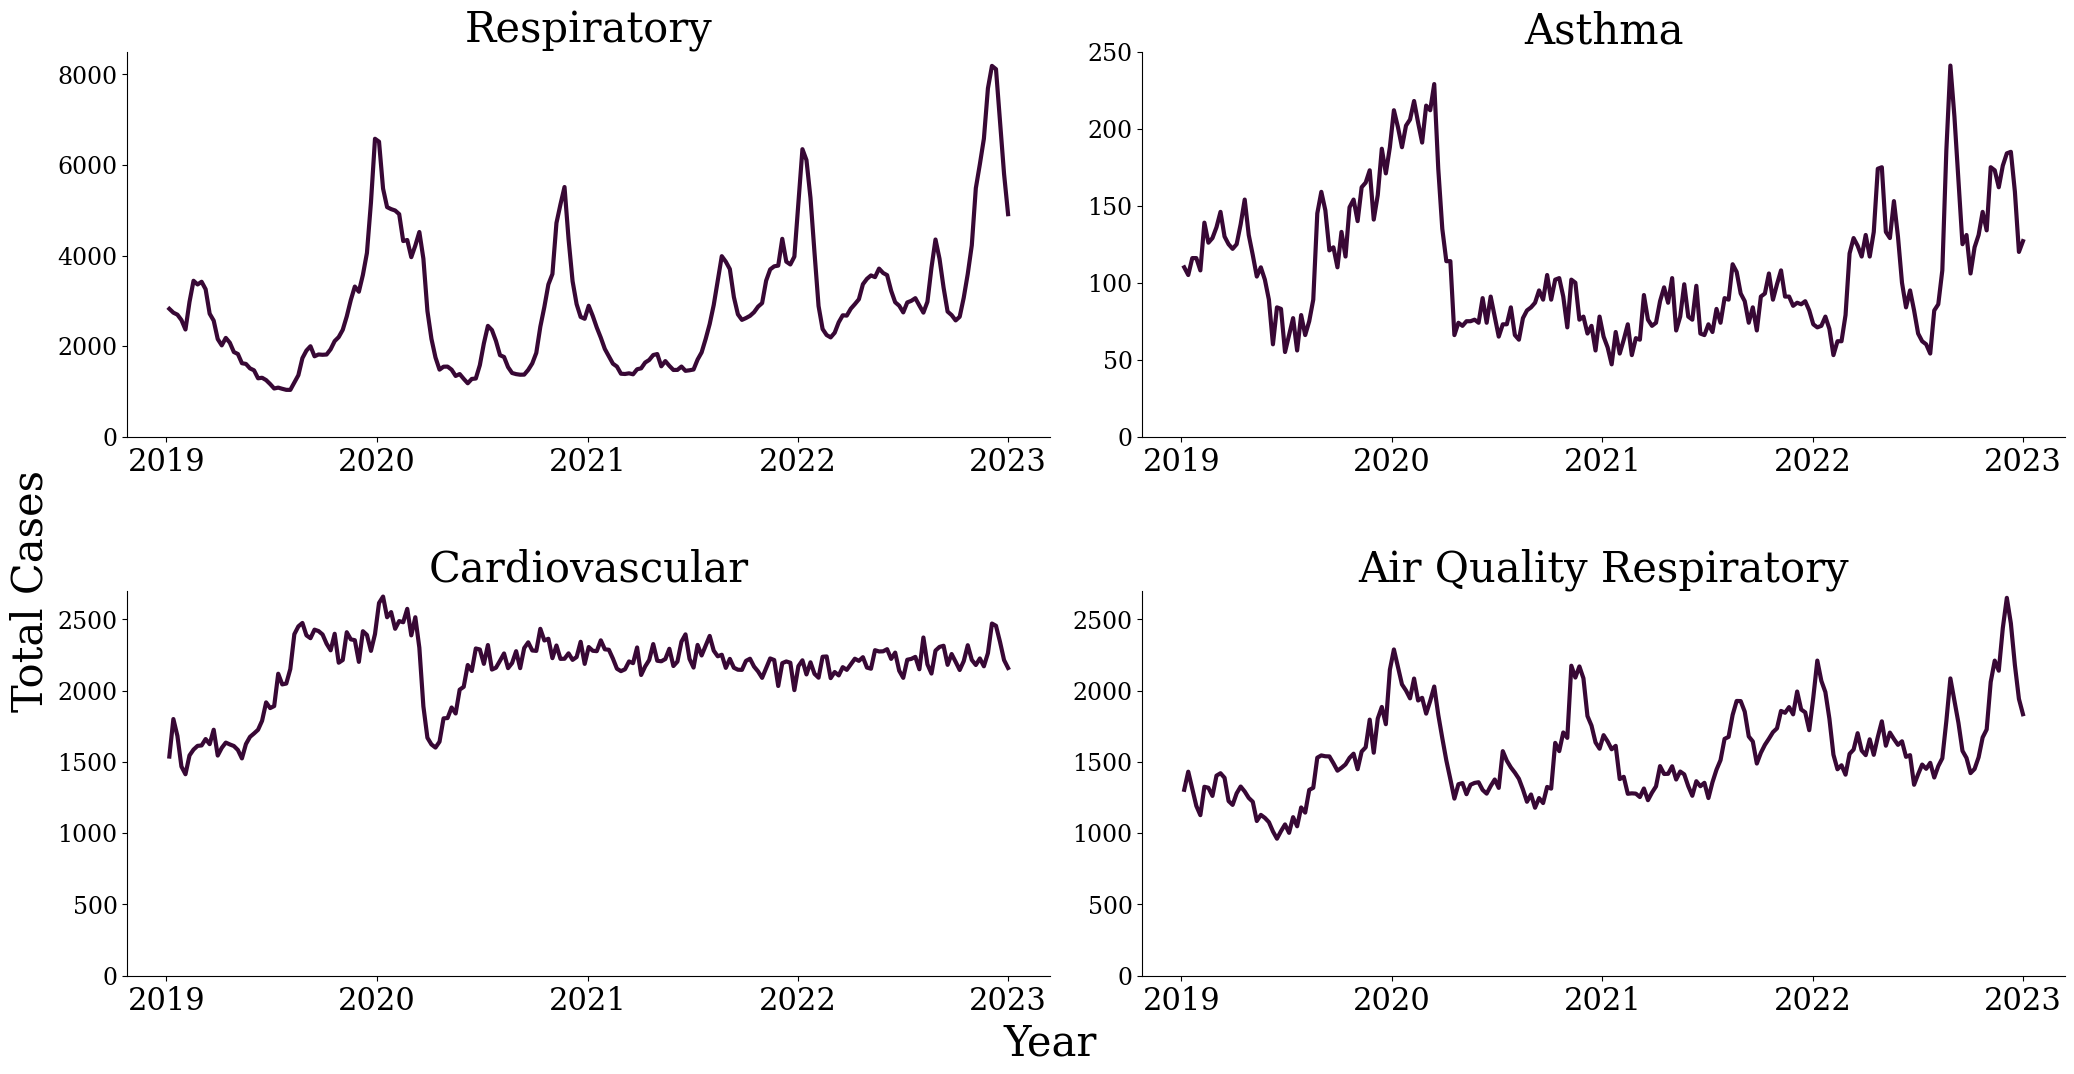

In [6]:
titles = ['Respiratory', 'Asthma', 'Cardiovascular', 'Air Quality Respiratory']
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(25,12),
                        gridspec_kw = {'wspace': 0.1, 'hspace': 0.4})
axs=axs.flatten()
for i in range(0,4):
    if (i == 0):
        axs[i].plot(weeklyESSENCE['Date'], weeklyESSENCE['BroadResp'], c = 'xkcd:eggplant', lw = 3)
        axs[i].set_ylim(0,8500)
    if (i == 1):
        axs[i].plot(weeklyESSENCE['Date'], weeklyESSENCE['Asthma'], c = 'xkcd:eggplant', lw = 3)
        axs[i].set_ylim(0,250)
    if (i == 2):
        axs[i].plot(weeklyESSENCE['Date'][weeklyESSENCE['Cardio'] != 0], weeklyESSENCE['Cardio'], c = 'xkcd:eggplant', lw = 3)
        axs[i].set_ylim(0,2700)
        axs[i].set_ylabel('Total Cases', y = 1, fontsize = 30)
        axs[i].set_xlabel('Year', fontsize = 30, x = 1)
    if (i == 3):
        axs[i].plot(weeklyESSENCE['Date'], weeklyESSENCE['AQResp'], c = 'xkcd:eggplant', lw = 3)
        axs[i].set_ylim(0,2700)
    axs[i].set_title(titles[i], fontsize  = 30)
    axs[i].xaxis.set_major_locator(mdates.YearLocator(base=1))
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    axs[i].tick_params(axis = 'x', labelsize = 22)
    axs[i].spines[['right', 'top']].set_visible(False)   
    fig.savefig('../Figures/timeseriesTotalESSENCEbyDiagnosis.png', dpi = 300, bbox_inches = 'tight')
    

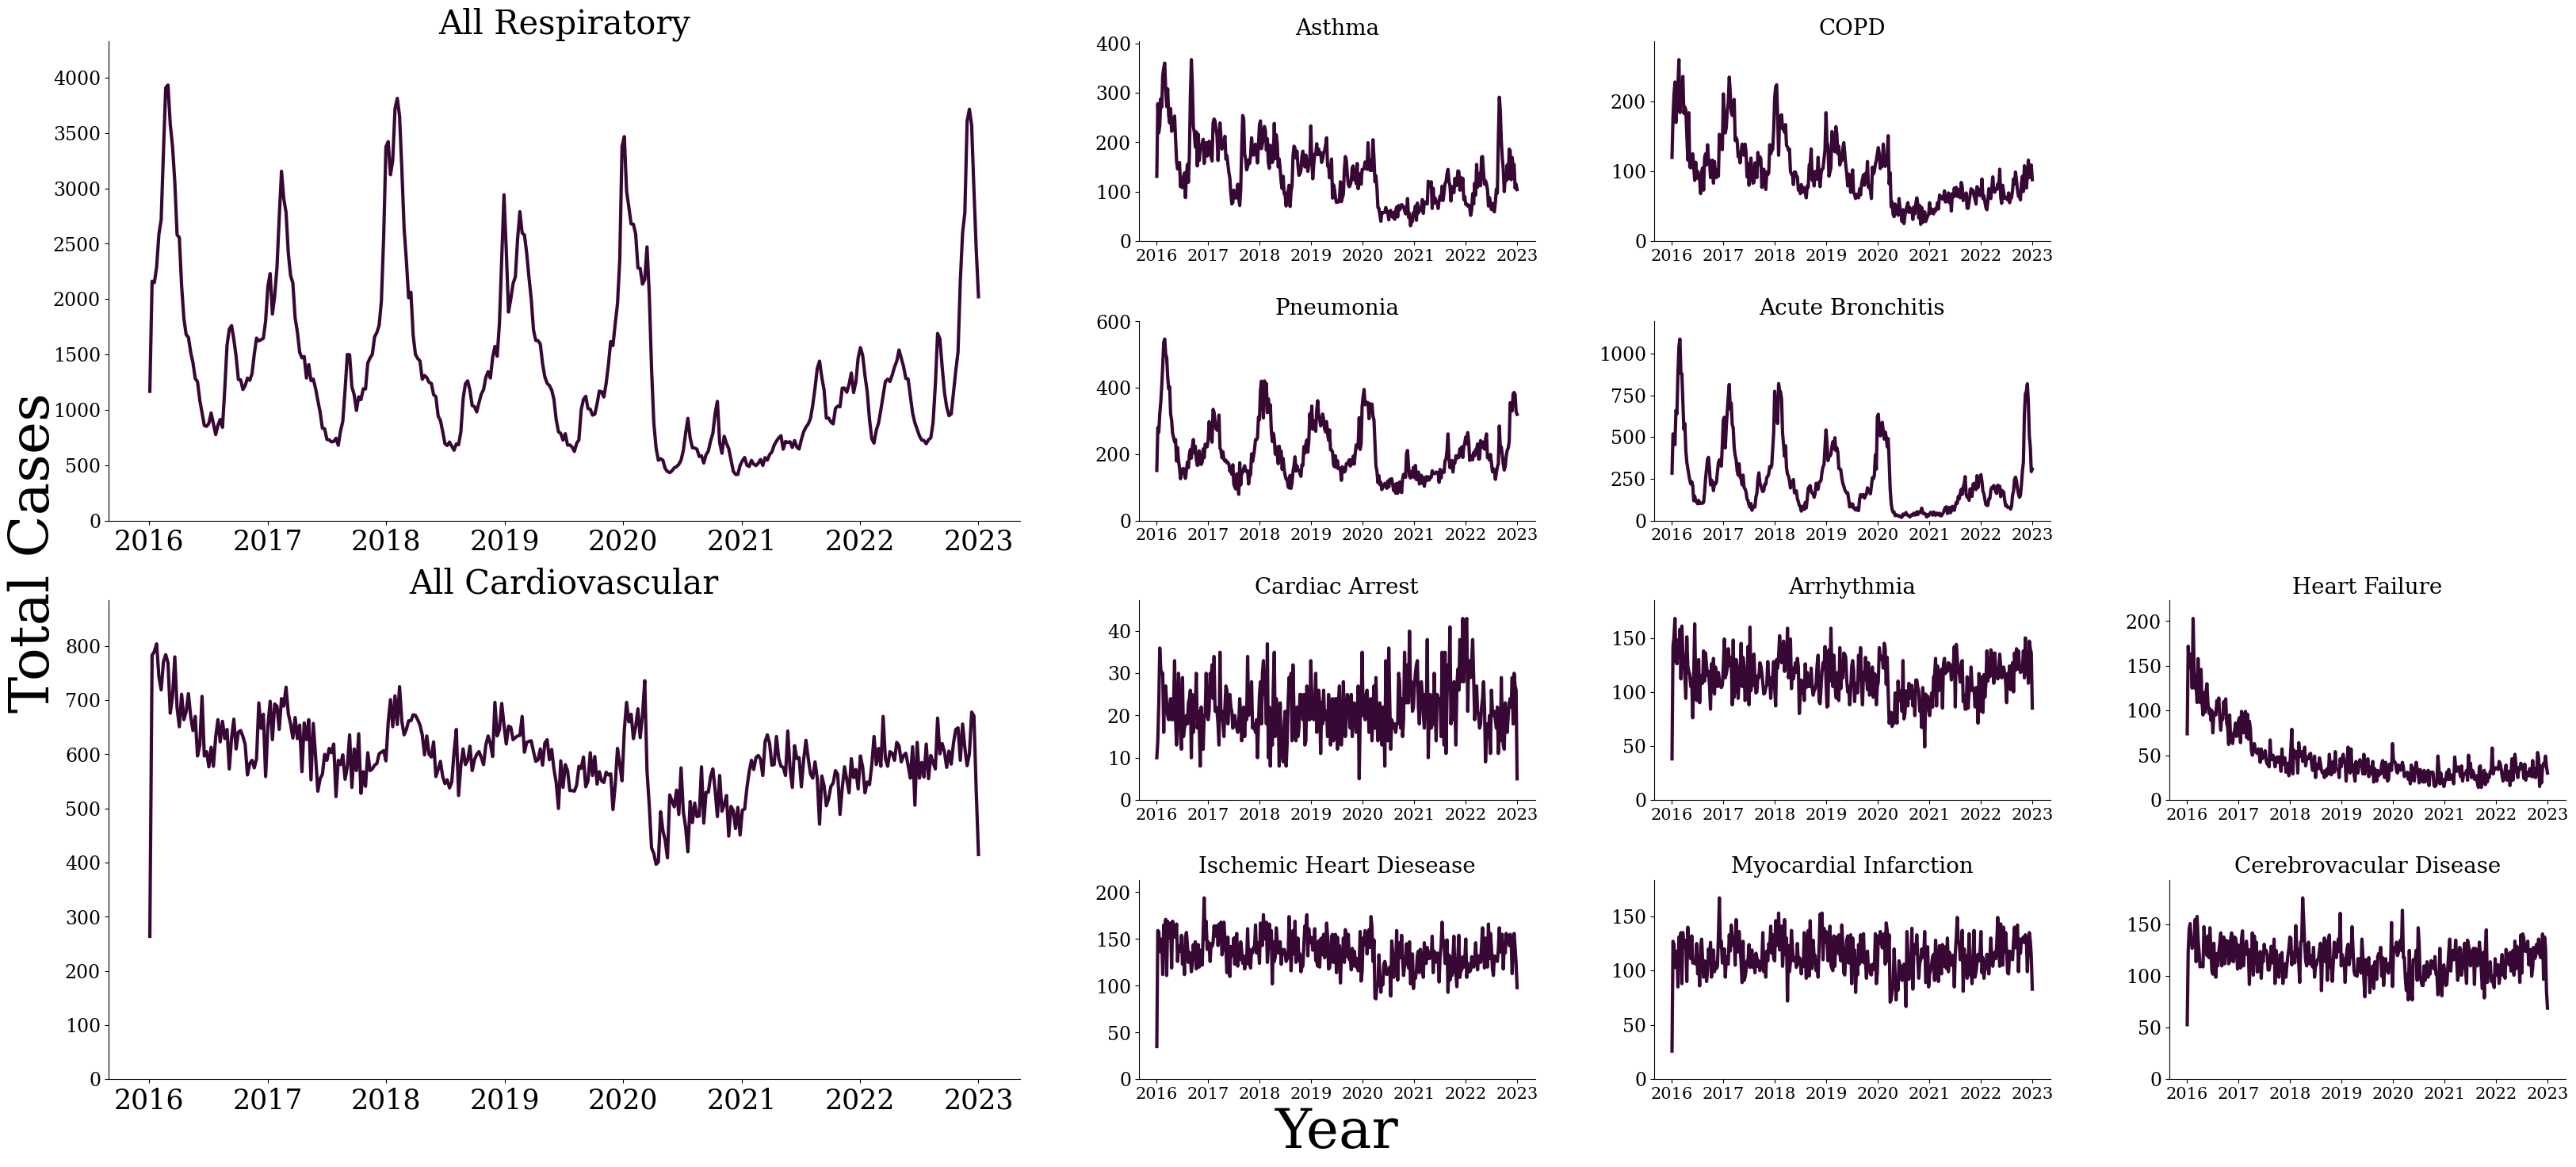

In [7]:
outcome = ["allresp1", "asthma1","COPD1","pneumonia1","bronchitis1", "allcardio1", "cardiacarrest1","arrythmia1","heartfail1","ischemic1","MI1","cerebrovascular1"]
titles = ['All Respiratory', 'Asthma', 'COPD', 'Pneumonia', 'Acute Bronchitis', 'All Cardiovascular', 'Cardiac Arrest', 'Arrhythmia', 'Heart Failure', 'Ischemic Heart Diesease', 
'Myocardial Infarction', 'Cerebrovacular Disease']

fig = plt.figure(figsize = (40,17))
plt.subplots_adjust(hspace=.4)
plt.subplots_adjust(wspace=.3)

ax0 = plt.subplot2grid((4, 5), (0, 0), rowspan = 2, colspan = 2)
ax1 = plt.subplot2grid((4, 5), (0, 2))
ax2 = plt.subplot2grid((4, 5), (0, 3))
ax3 = plt.subplot2grid((4, 5), (1, 2))
ax4 = plt.subplot2grid((4, 5), (1, 3))

ax5 = plt.subplot2grid((4, 5), (2, 0), colspan = 2, rowspan = 2)
ax6 = plt.subplot2grid((4, 5), (2, 2))
ax7 = plt.subplot2grid((4, 5), (2, 3))
ax8= plt.subplot2grid((4, 5), (2, 4))
ax9 = plt.subplot2grid((4, 5), (3, 2))
ax10 = plt.subplot2grid((4, 5), (3, 3))
ax11 = plt.subplot2grid((4, 5), (3, 4))

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]
for i in range(0, 12):
    df_ED = weeklyED[weeklyED[outcome[i]] != 0]
    axes[i].plot(df_ED['Date'], df_ED[outcome[i]], c = 'xkcd:eggplant', lw = 3)
    axes[i].set_title(titles[i], fontsize = 30)
    axes[i].spines[['right', 'top']].set_visible(False)   
    axes[i].tick_params(axis = 'x', labelsize = 25)
    axes[i].set_ylim([0, np.max(df_ED[outcome[i]]) * 1.1])
    if (i == 1) | (i == 2) | (i == 3) | (i == 4) | (i == 6) | (i == 7) | (i == 8) | (i == 9) | (i == 10) | (i == 11):
        axes[i].tick_params(axis = 'x', labelsize = 15)
        axes[i].set_title(titles[i], fontsize = 20)
    if (i == 5):
        axes[i].set_ylabel('Total Cases', fontsize = 50, y  = 1.1)
    if (i == 9):
        axes[i].set_xlabel('Year', fontsize = 50)
fig.savefig('../Figures/timeseriesTotalEDbyDiagnosis.png', dpi = 300, bbox_inches = 'tight')


C:\Users\olivia.sablan\AppData\Local\Temp\ipykernel_14700\739487153.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid = year[(year['age'] >= 15) & (asthma['age'] < 65)]


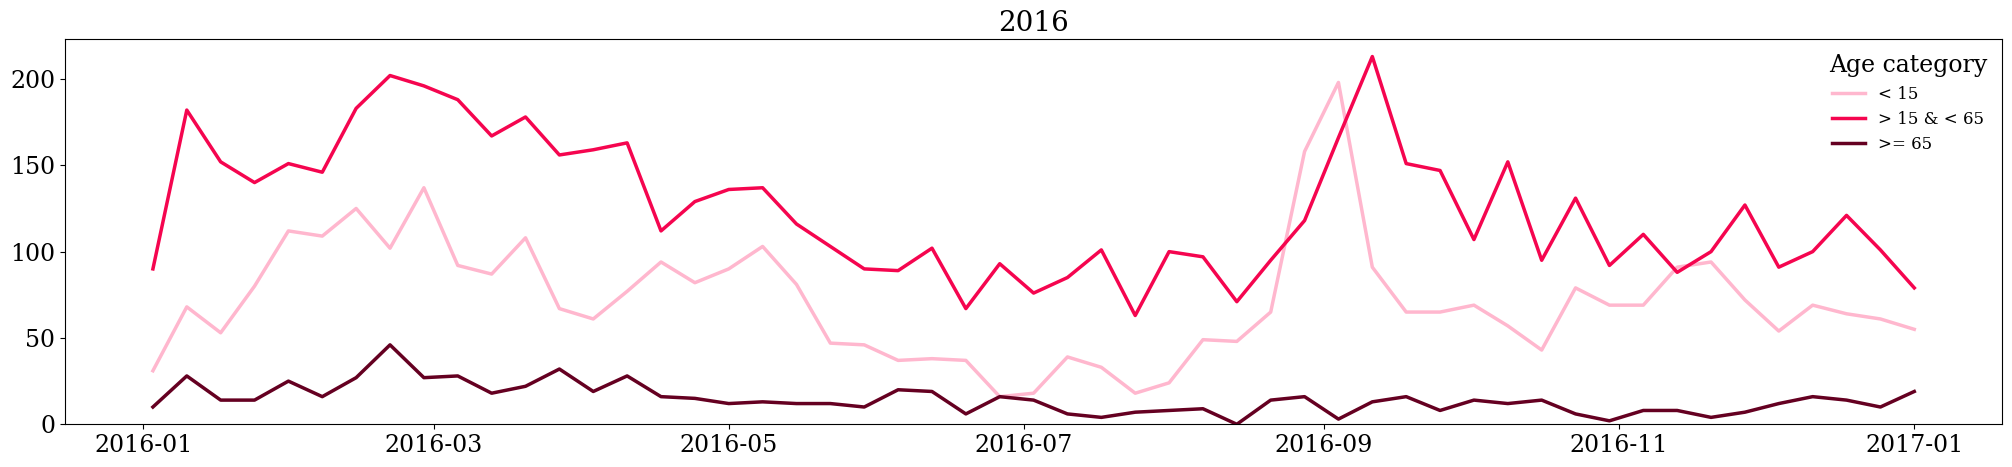

C:\Users\olivia.sablan\AppData\Local\Temp\ipykernel_14700\739487153.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid = year[(year['age'] >= 15) & (asthma['age'] < 65)]


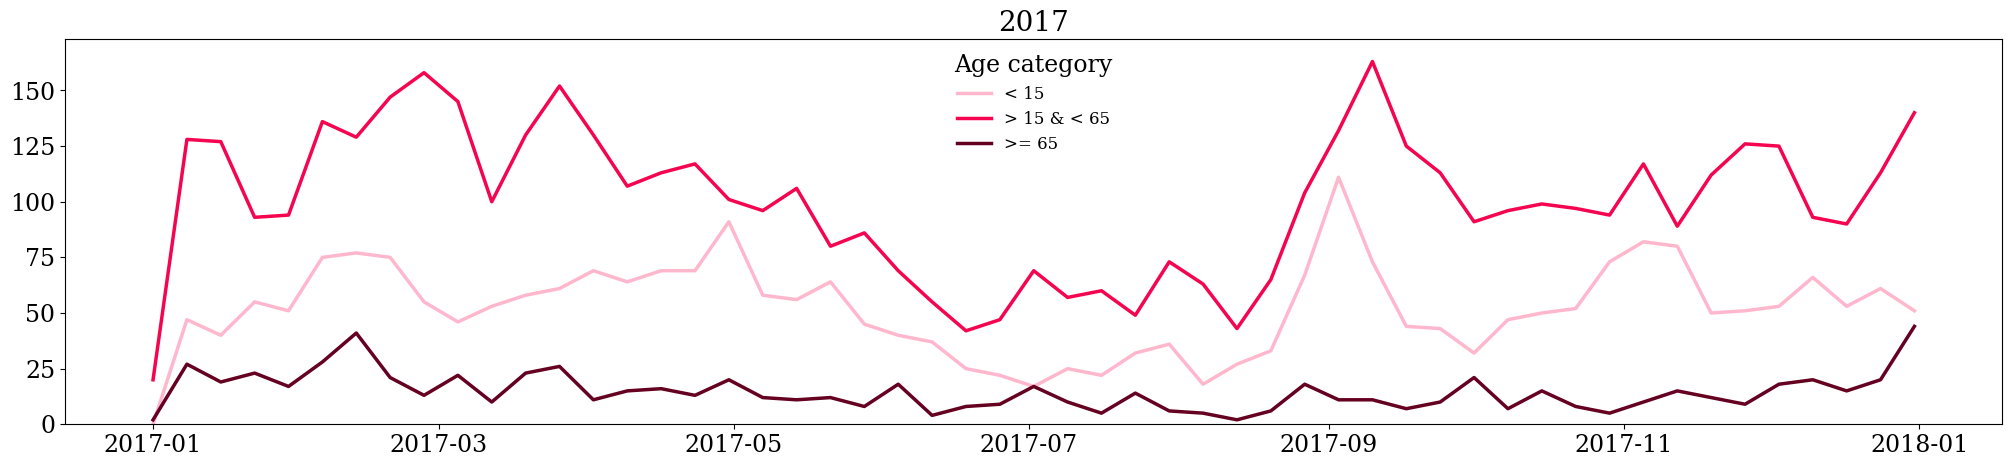

C:\Users\olivia.sablan\AppData\Local\Temp\ipykernel_14700\739487153.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid = year[(year['age'] >= 15) & (asthma['age'] < 65)]


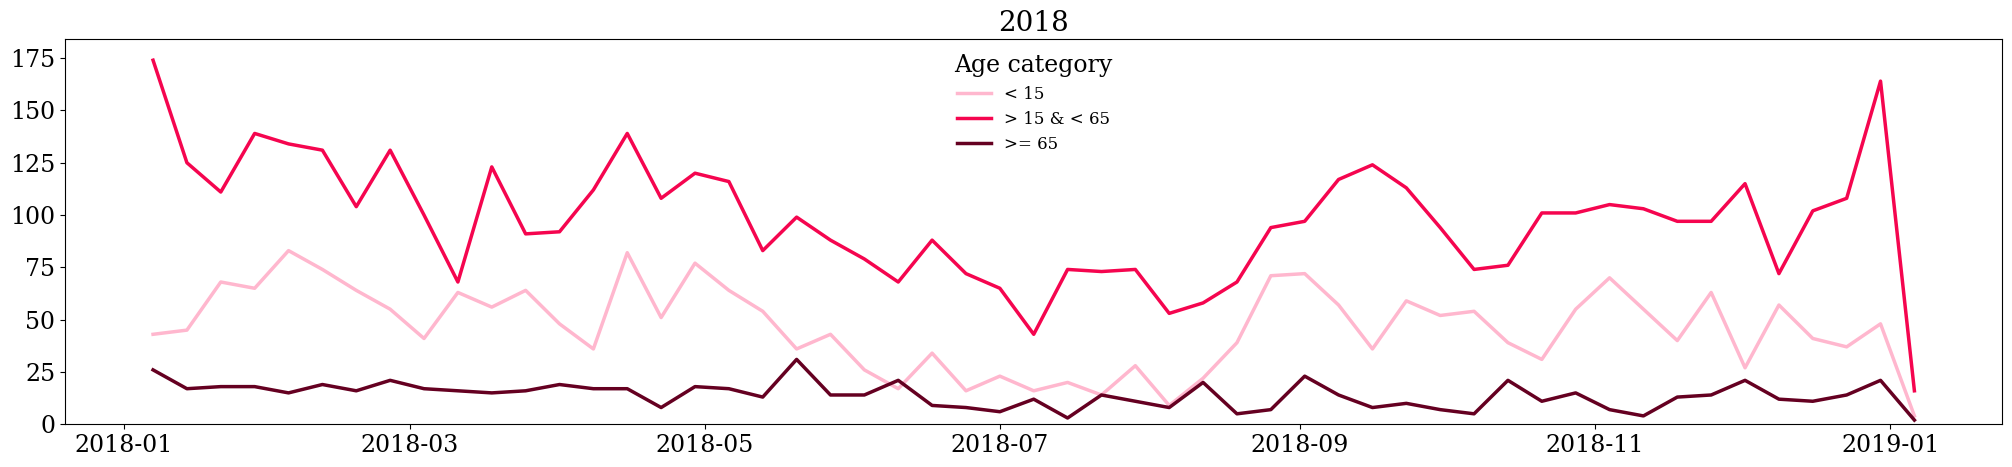

C:\Users\olivia.sablan\AppData\Local\Temp\ipykernel_14700\739487153.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid = year[(year['age'] >= 15) & (asthma['age'] < 65)]


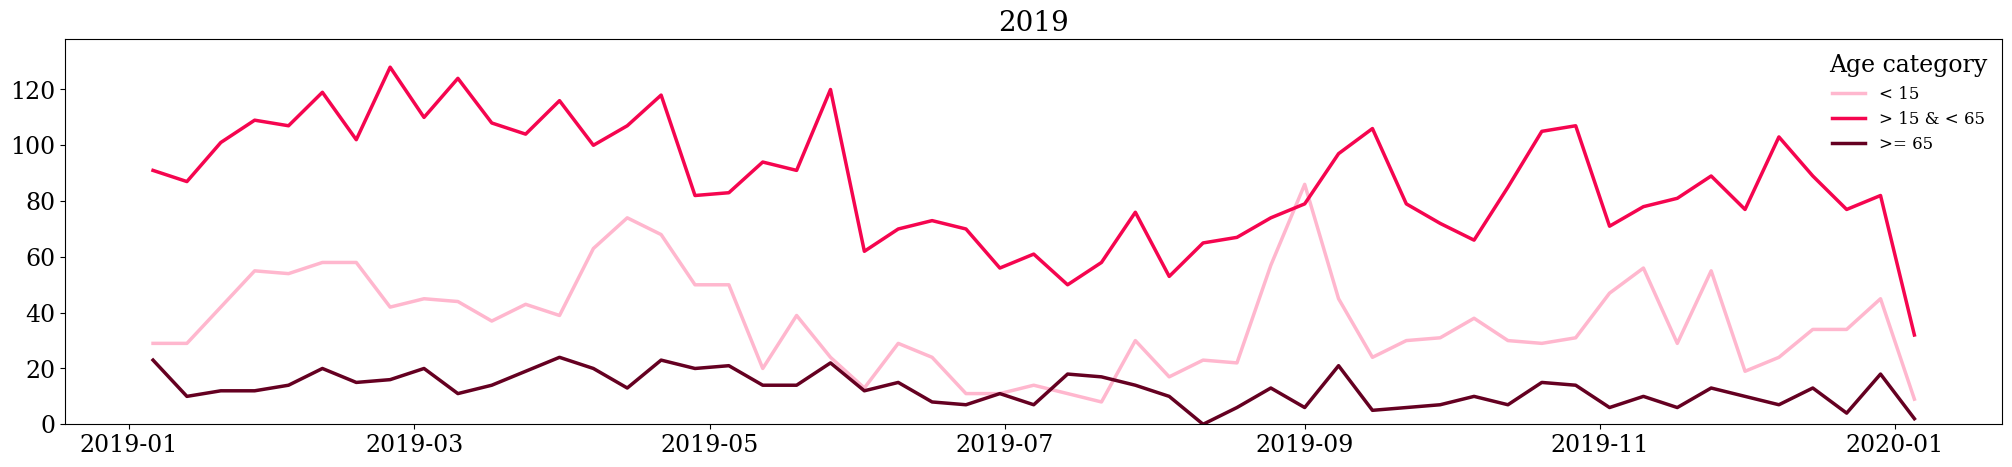

C:\Users\olivia.sablan\AppData\Local\Temp\ipykernel_14700\739487153.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid = year[(year['age'] >= 15) & (asthma['age'] < 65)]


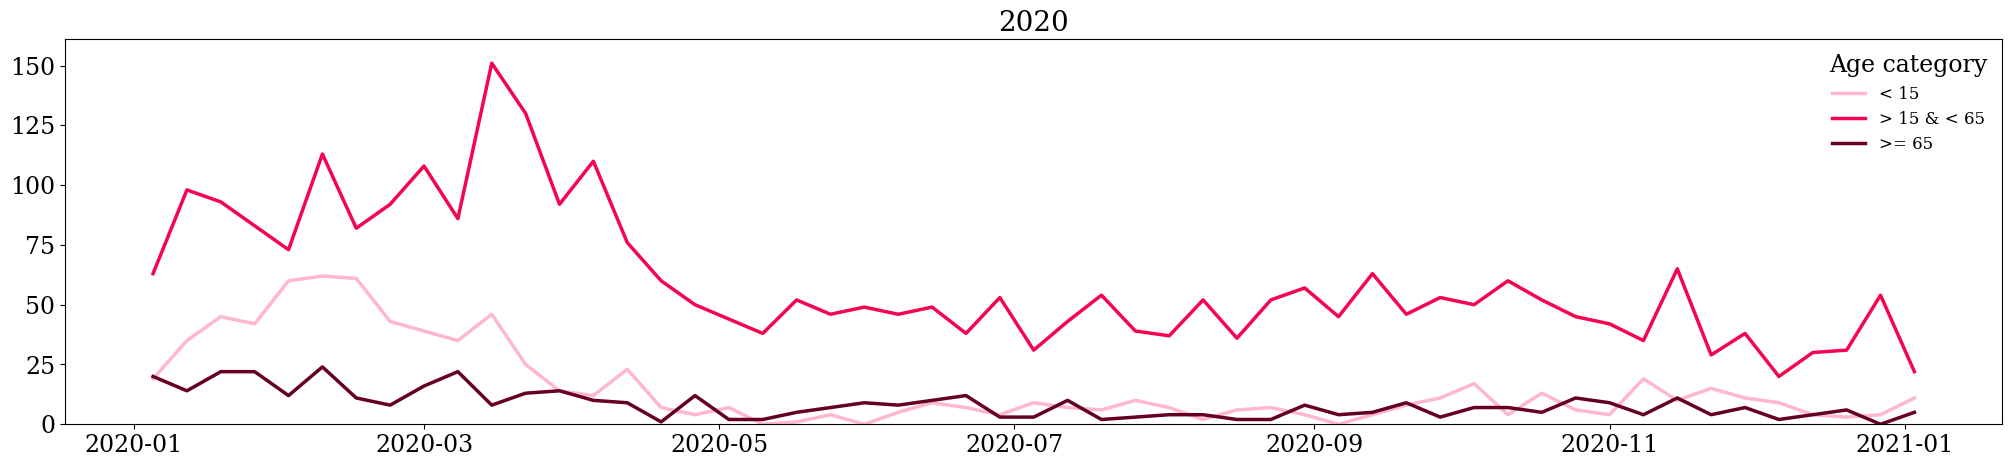

C:\Users\olivia.sablan\AppData\Local\Temp\ipykernel_14700\739487153.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid = year[(year['age'] >= 15) & (asthma['age'] < 65)]


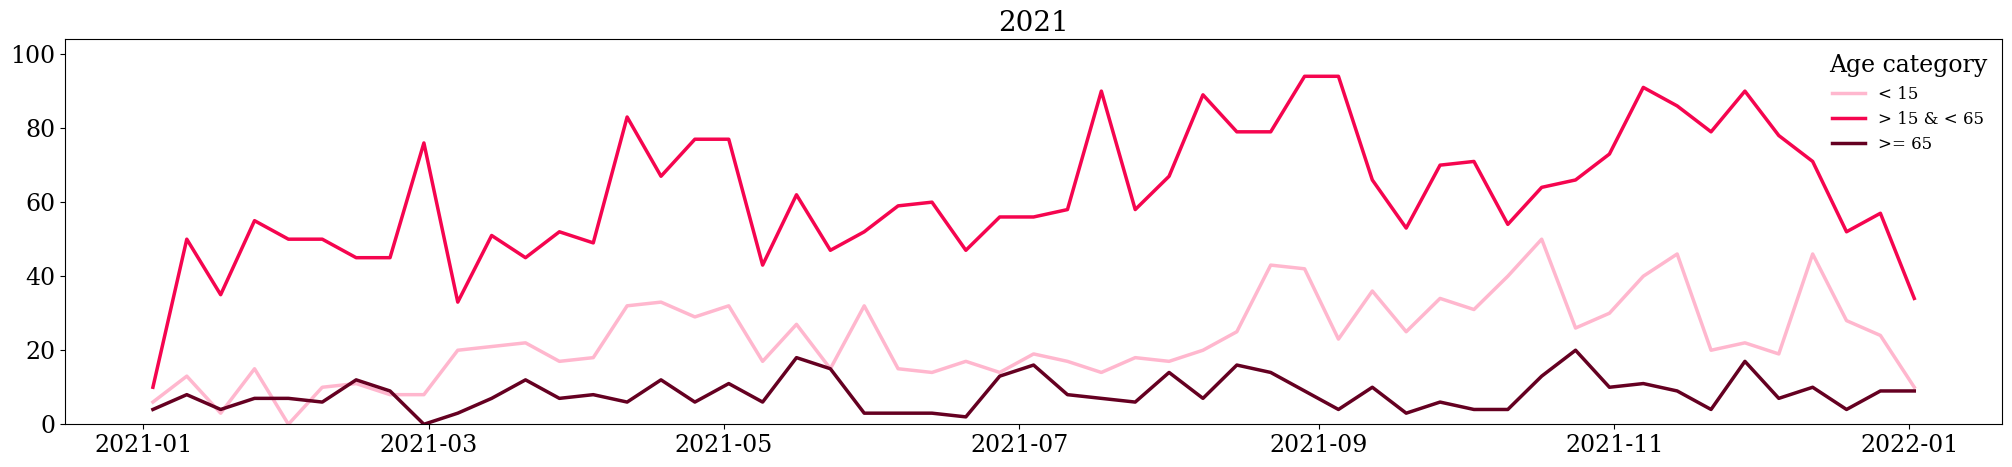

C:\Users\olivia.sablan\AppData\Local\Temp\ipykernel_14700\739487153.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mid = year[(year['age'] >= 15) & (asthma['age'] < 65)]


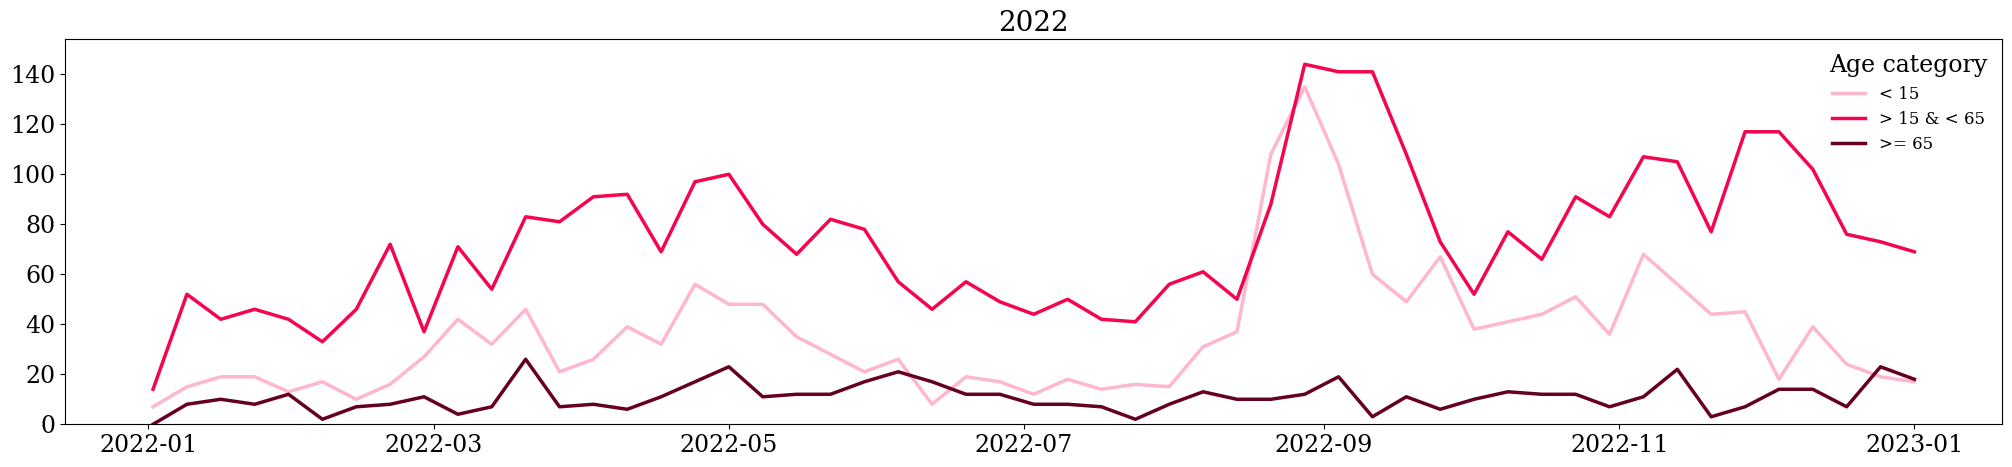

In [8]:
asthma = ED[['Date', 'age', 'asthma1']]

years = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
for i in range(len(years)):
    year = asthma[asthma['Date'].dt.strftime('%Y') == years[i]]
    young = year[year['age'] < 15]
    weeklyyoung = young.groupby(pd.Grouper(key = 'Date', freq = '1W')).sum().reset_index()
    mid = year[(year['age'] >= 15) & (asthma['age'] < 65)]
    weeklymid = mid.groupby(pd.Grouper(key = 'Date', freq = '1W')).sum().reset_index()
    older = year[year['age'] >= 65]
    weeklyolder = older.groupby(pd.Grouper(key = 'Date', freq = '1W')).sum().reset_index()
    fig, ax = plt.subplots(figsize = (25, 5))
    ax.plot(weeklyyoung['Date'], weeklyyoung['asthma1'], lw = 2.5, color = 'xkcd:baby pink', label = '< 15')
    ax.plot(weeklymid['Date'], weeklymid['asthma1'], lw = 2.5 , color = 'xkcd:pink red', label = '> 15 & < 65')
    ax.plot(weeklyolder['Date'], weeklyolder['asthma1'], lw = 2.5 , color = 'xkcd:maroon', label = '>= 65')
    ax.legend(frameon = False, fontsize = 12, title = 'Age category')
    ax.set_title(years[i], fontsize = 20)
    ax.set_ylim([0, weeklymid['asthma1'].max() + 10])
    plt.show()
    fig.savefig('../Figures/AsthmaAgeByYear/asthma_' + years[i] + '.png', dpi = 300, bbox_inches = 'tight')